In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


### Data Collection & Processing

In [53]:
df = pd.read_csv(r"C:\Users\lluri\Documents\samplerepo\Upgrade Hub\Modulo 1\12-Scripts, APIs, Streamlit\Titanic Streamlit\titaniccsv.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
df.shape

(891, 12)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [57]:
# Find NAN
nan_df = df[df.isna().any(axis=1)]
nan_df.count()

PassengerId    708
Survived       708
Pclass         708
Name           708
Sex            708
Age            531
SibSp          708
Parch          708
Ticket         708
Fare           708
Cabin           21
Embarked       706
dtype: int64

In [58]:
df.isnull().sum().sum()
#Cuantos valores nulos contiene:

866

In [59]:
df.isnull().sum()
#Cuantos valores nulos contiene:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [60]:
percent_missing = df.isnull().sum() * 100 / len(df)
print(percent_missing)
#Que % tienen en cada columna
# Podemos reparar 'Embarked' y 'Age' (valores nulos < 30%). No podemos reparar 'Cabin'

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [61]:
#drop the unusable column
df.drop('Cabin', inplace=True, axis=1)

In [62]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [63]:
df['Age'].fillna((df['Age'].mean()), inplace=True)
 #Replace all nan values with mean of column


In [64]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [65]:
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [66]:
# replace all nan values in Embarked with most common value in column
df = df.fillna(df['Embarked'].value_counts().index[0])


In [67]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [68]:
df.isnull().sum()
#Confirm no null values left

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Data analysis

In [69]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [70]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Data visualization

In [71]:
sns.set()

In [72]:
proporcion = df["Survived"].value_counts().head()

#graficamos

fig = go.Figure(data=[go.Pie(labels=(proporcion/len(df * 100)).index, values=(proporcion/len(df * 100)).values, text=proporcion.index,hole=.4) ])

fig.update_layout(title = 'Survival', template = 'plotly_dark')

fig.show()

<AxesSubplot: xlabel='Sex', ylabel='count'>

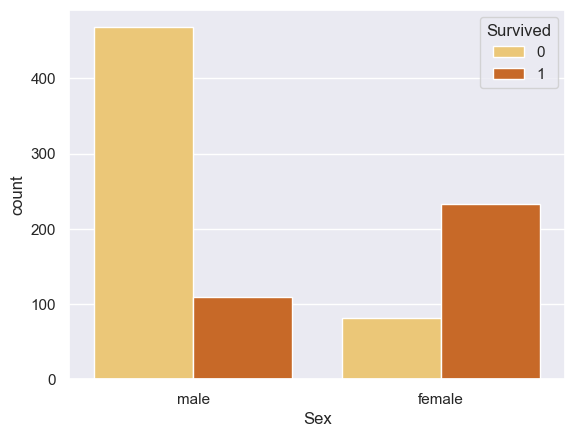

In [73]:
sns.countplot(data=df, x=df['Sex'], hue='Survived', palette='YlOrBr')


<AxesSubplot: xlabel='Pclass', ylabel='count'>

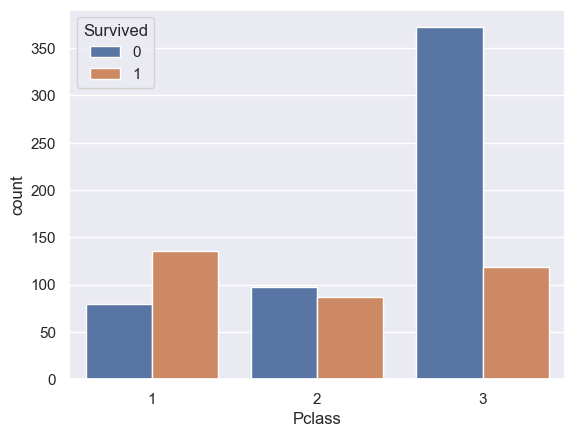

In [74]:
sns.countplot(data=df, x=df['Pclass'], hue='Survived')

<AxesSubplot: xlabel='Embarked', ylabel='count'>

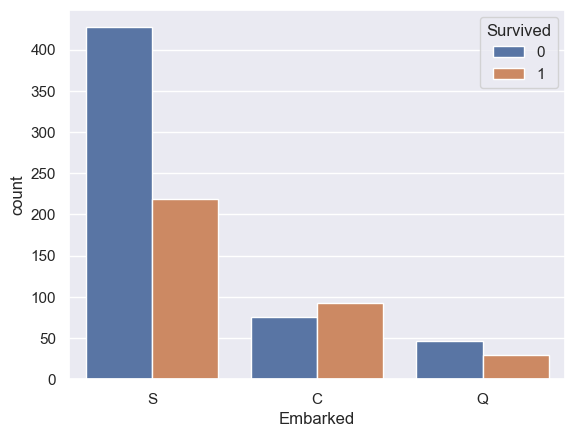

In [75]:
sns.countplot(data=df, x=df['Embarked'], hue='Survived')

Encoding categorical columns


In [76]:
#We check all different values in column
df['Survived'].value_counts()
df['Embarked'].value_counts()


S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [77]:
#Converting categorical columns into numerical

df.replace({'Sex':{'male': 0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [78]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


Separating features & target

In [79]:
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
Y = df['Survived']

In [80]:
print(X)
print(Y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Splitting data into training and testing


In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.2, random_state=2)

In [82]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


Model training

In [83]:
model = LogisticRegression()

In [84]:
#feeding training data
model.fit(X_train,Y_train)

c:\Users\lluri\Documents\samplerepo\venv_analytics\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

Model Evaluation

In [85]:
X_train_prediction = model.predict(X_train)

In [86]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data is: ', training_data_accuracy)

Accuracy score of training data is:  0.8075842696629213


In [87]:
X_test_prediction = model.predict(X_test)

In [88]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of testing data is: ', test_data_accuracy)

Accuracy score of testing data is:  0.7821229050279329


In [89]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


Making a predictive system

In [90]:
input_data = (3,0,22.0,1,0,7.2500,0)
scaler = StandardScaler()

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped)

[[ 3.    0.   22.    1.    0.    7.25  0.  ]]


In [91]:

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('The person would not have survived')
else:
    print('The person would have survived')

[0]
The person would not have survived


c:\Users\lluri\Documents\samplerepo\venv_analytics\lib\site-packages\sklearn\base.py:409: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



Saving the trained model

In [92]:
import pickle

In [93]:
filename = 'trained_model_titanic.sav'
pickle.dump(model, open(filename,'wb'))

Loading the saved model

In [94]:
loaded_model = pickle.load(open('trained_model_titanic.sav', 'rb'))

In [95]:
input_data = (3,0,22.0,1,0,7.2500,0)
scaler = StandardScaler()

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('The person would not have survived')
else:
    print('The person would have survived')

[[ 3.    0.   22.    1.    0.    7.25  0.  ]]
[0]
The person would not have survived


c:\Users\lluri\Documents\samplerepo\venv_analytics\lib\site-packages\sklearn\base.py:409: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [96]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0
